# Ngày 25: Work with Image Data
https://drive.google.com/file/d/1P5eS4db_f4x8kNOdPf1tffM2qo4XGI8C/view

In [1]:
!pip install numpy
!pip install opencv-python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
def gaussian_kernel(size, sigma):
    if size % 2 == 0:
        size = size + 1  # Đảm bảo kích thước của kernel là số lẻ

    max_point = size // 2  # Điểm tối đa trong cả hai hướng (x, y)
    min_point = -max_point  # Điểm tối thiểu trong cả hai hướng (x, y)

    K = np.zeros((size, size))  # Ma trận kernel
    for x in range(min_point, max_point + 1):
        for y in range(min_point, max_point + 1):
            value = (1 / (2 * np.pi * sigma**2)) * np.exp(- (x**2 + y**2) / (2 * sigma**2)) # Gaussian Filter Formula Here (Giá trị cần tính theo công thức Gauss)
            K[x - min_point, y - min_point] = value  # Gán giá trị vào ma trận kernel

    return K  # Trả về ma trận kernel

kernel = gaussian_kernel(5, 1.4)  # Tạo kernel với kích thước 5x5 và sigma 1.4
img = cv2.imread("/content/2.jpg", 0)  # Đọc ảnh từ đường dẫn
img_gaussian = cv2.filter2D(img, -1, kernel)  # Áp dụng bộ lọc Gaussian lên ảnh

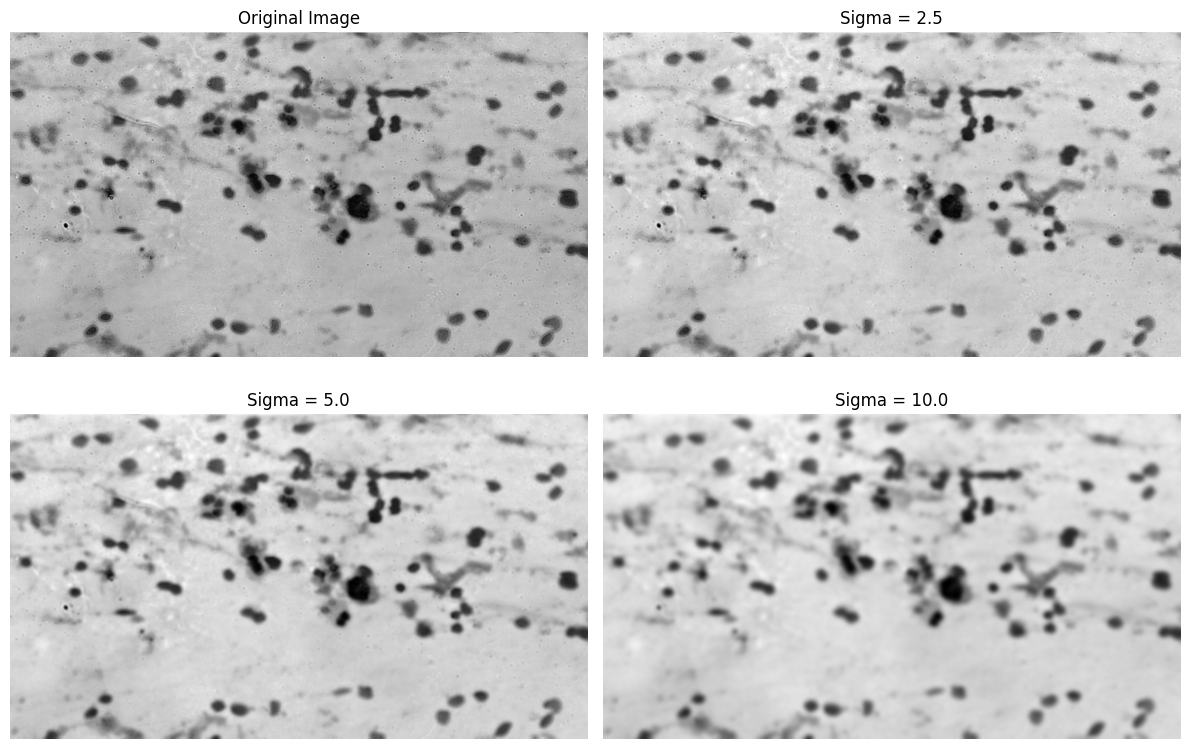

In [7]:
def apply_gaussian_filter(image_path, sigmas):
    img = cv2.imread(image_path, 0)  # Đọc ảnh dưới dạng ảnh xám (grayscale)

    plt.figure(figsize=(12, 8))

    # Hiển thị ảnh gốc
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    for i, sigma in enumerate(sigmas, start=2):
        # Tạo kernel Gaussian với sigma tương ứng
        kernel_size = int(6 * sigma + 1)
        kernel = gaussian_kernel(kernel_size, sigma)

        # Áp dụng bộ lọc Gaussian lên ảnh
        img_gaussian = cv2.filter2D(img, -1, kernel)

        # Hiển thị ảnh đã áp dụng Gaussian Blur
        plt.subplot(2, 2, i)
        plt.imshow(img_gaussian, cmap='gray')
        plt.title(f'Sigma = {sigma}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Đường dẫn đến file ảnh
image_path = "/content/2.jpg"  # Thay "/content/2.jpg" bằng đường dẫn thực tế đến ảnh của bạn

# Các giá trị sigma cần áp dụng
sigmas = [2.5, 5.0, 10.0]

# Gọi hàm để áp dụng Gaussian Filter và hiển thị kết quả
apply_gaussian_filter(image_path, sigmas)